# Prueba Técnica Lopez y Asociados

Marco Antonio Quintero Gómez

CC 1007459497

In [118]:
# Se cargan las librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

In [32]:
# Se leen los datos
data = pd.read_excel('base 1000.xlsx')

In [33]:
data.head()

,RANKING,NIT,INGRESOS OPERACIONALES\n2021*,GANANCIA (PERDIDA) 2021,TOTAL ACTIVOS 2021,TOTAL PASIVOS 2021,TOTAL PATRIMONIO 2021,INGRESOS OPERACIONALES\n2020*,GANANCIA (PERDIDA) 2020,TOTAL ACTIVOS 2020,TOTAL PASIVOS 2020,TOTAL PATRIMONIO 2020,GRUPO EN NIIF
0,1,899999068,8.494899e+10,1.669468e+10,1.716032e+11,9.987015e+10,7.173302e+10,4.743406e+10,1.688077e+09,1.283444e+11,7.624912e+10,5.209525e+10,GRUPO 1
1,2,830095213,1.701241e+10,3.757217e+08,6.336788e+09,3.761811e+09,2.574978e+09,1.260509e+10,-3.973824e+07,5.631291e+09,3.632916e+09,1.998374e+09,GRUPO 1
2,3,900112515,1.550323e+10,-3.717798e+08,3.544079e+10,1.500892e+10,2.043187e+10,8.794983e+09,-1.482958e+09,2.904304e+10,1.061281e+10,1.843023e+10,10 NIIF Plenas - Individual Grupo 1
3,4,800153993,1.464443e+10,1.994854e+09,2.138282e+10,1.251272e+10,8.870095e+09,1.331561e+10,1.274650e+09,1.875501e+10,1.187977e+10,6.875241e+09,20 NIIF Plenas - Separado Grupo 1
4,5,890900608,1.302792e+10,4.746815e+08,1.442247e+10,7.541065e+09,6.881405e+09,1.219340e+10,2.308722e+08,1.346808e+10,7.264217e+09,6.203863e+09,GRUPO 1


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   RANKING                       1000 non-null   int64   
 1   NIT                           1000 non-null   int64   
 2   INGRESOS OPERACIONALES
2021*  1000 non-null   float64 
 3   GANANCIA (PERDIDA) 2021       1000 non-null   float64 
 4   TOTAL ACTIVOS 2021            1000 non-null   float64 
 5   TOTAL PASIVOS 2021            1000 non-null   float64 
 6   TOTAL PATRIMONIO 2021         1000 non-null   float64 
 7   INGRESOS OPERACIONALES
2020*  1000 non-null   float64 
 8   GANANCIA (PERDIDA) 2020       1000 non-null   float64 
 9   TOTAL ACTIVOS 2020            1000 non-null   float64 
 10  TOTAL PASIVOS 2020            1000 non-null   float64 
 11  TOTAL PATRIMONIO 2020         1000 non-null   float64 
 12  GRUPO EN NIIF                 996 non-null    obj

Se crea una variables categórica dividiendo en 5 grupos de empresas según los ingrésos operacionales

In [54]:
data['RANKING'] = pd.to_numeric(data['RANKING'])
data['Rank_cat'] = pd.cut(data['RANKING'], bins=[0,200,400,600,800,1000], labels=['200','400','600','800','1000'])

Se hace un análisis exploratiorio de la distribución de las variables dadas, ingresos operacionales, ganancias, total activo, total pasivo, total patrimonio.

<AxesSubplot:xlabel='TOTAL PATRIMONIO 2021', ylabel='Rank_cat'>

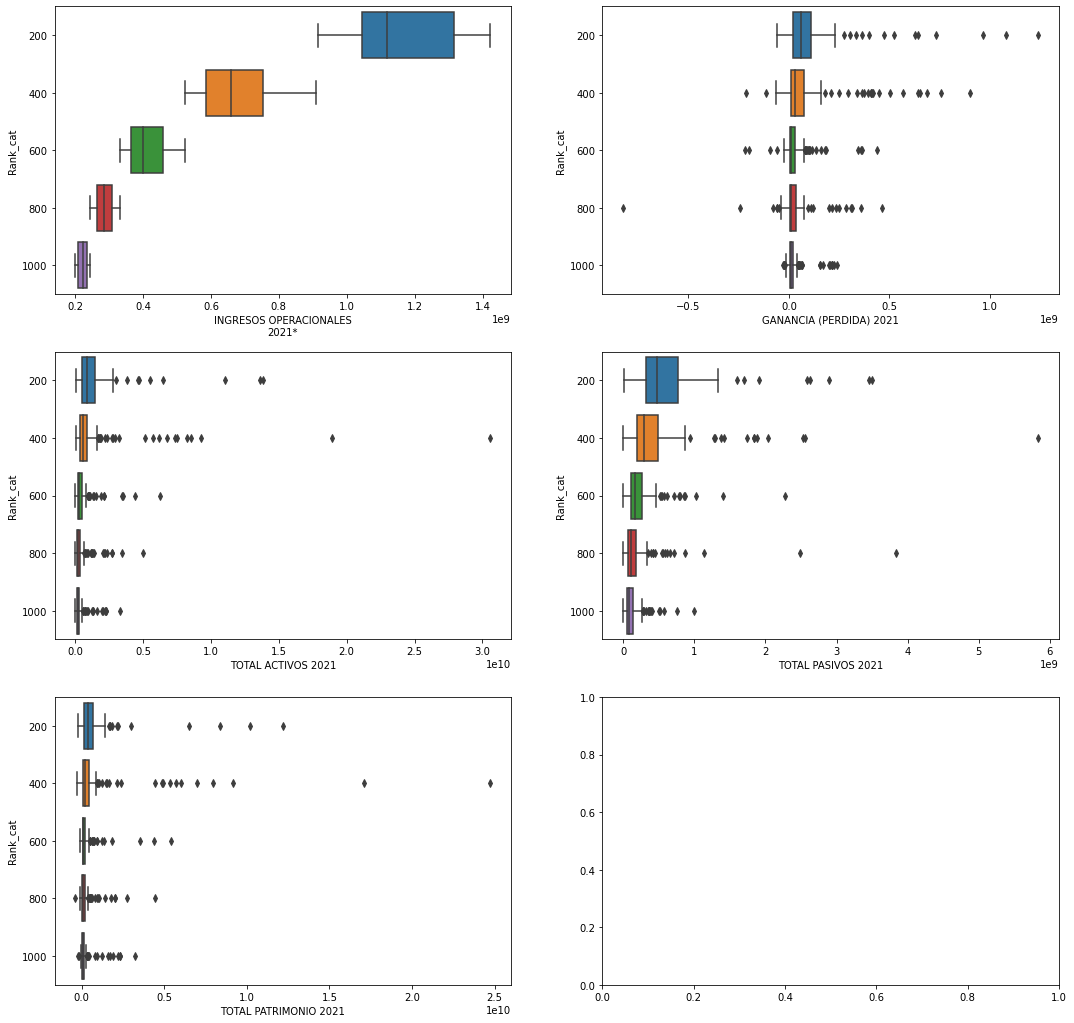

In [112]:


filt1 = data['INGRESOS OPERACIONALES\n2021*'] < data['INGRESOS OPERACIONALES\n2021*'][100]
data1 = data[filt1]
sns.boxplot(x = data1['INGRESOS OPERACIONALES\n2021*'], y = data1['Rank_cat'], ax = ax[0,0])

sns.boxplot(x = data1['GANANCIA (PERDIDA) 2021'], y = data1['Rank_cat'], ax = ax[0,1])


sns.boxplot(x = data1['TOTAL ACTIVOS 2021'], y = data1['Rank_cat'], ax = ax[1,0])


sns.boxplot(x = data1['TOTAL PASIVOS 2021'], y = data1['Rank_cat'], ax = ax[1,1])


sns.boxplot(x = data1['TOTAL PATRIMONIO 2021'], y = data1['Rank_cat'], ax = ax[2,0])

<AxesSubplot:xlabel='TOTAL PATRIMONIO 2021', ylabel='Rank_cat'>

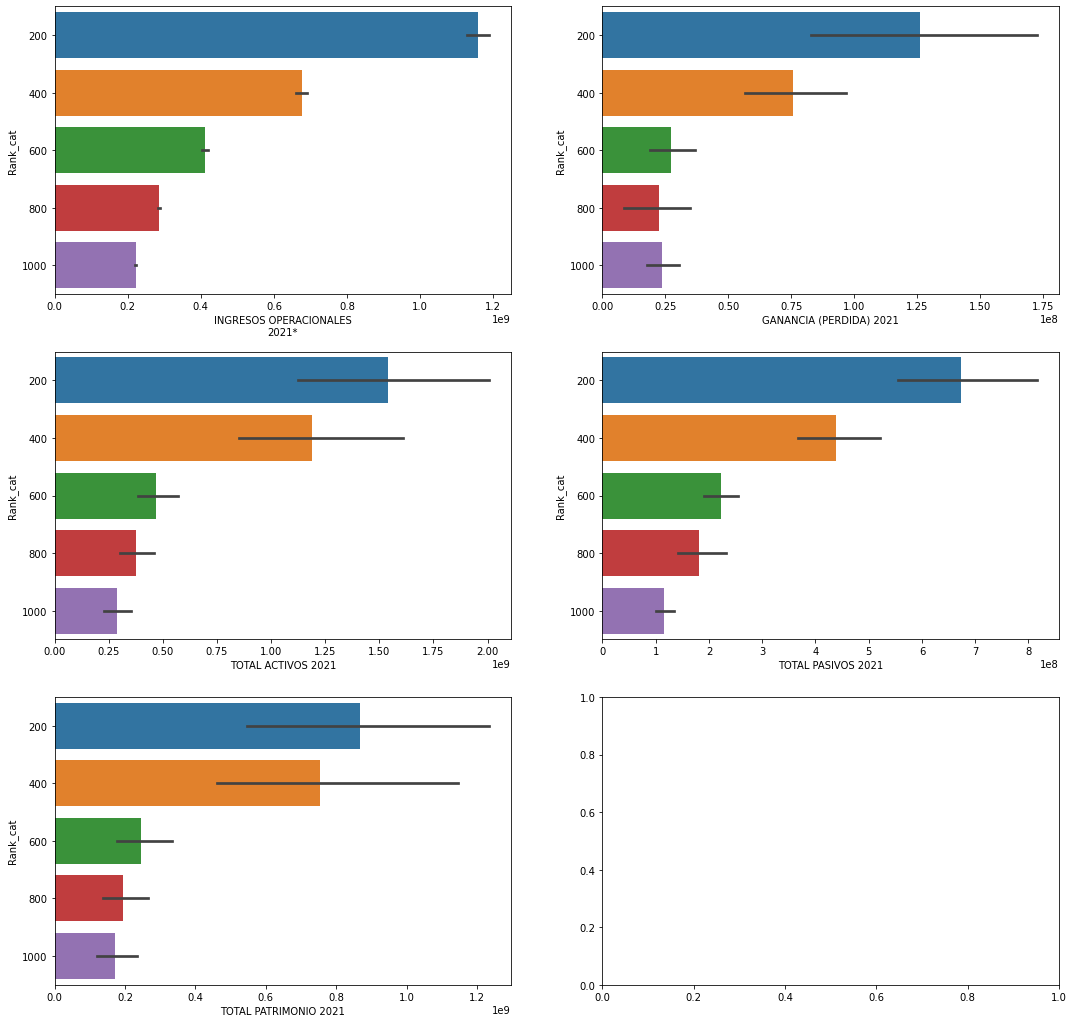

In [133]:
fig, ax = plt.subplots(3,2, figsize = (18,18))
sns.barplot(x = data1['INGRESOS OPERACIONALES\n2021*'], y = data1['Rank_cat'], ax = ax[0,0])

sns.barplot(x = data1['GANANCIA (PERDIDA) 2021'], y = data1['Rank_cat'], ax = ax[0,1])


sns.barplot(x = data1['TOTAL ACTIVOS 2021'], y = data1['Rank_cat'], ax = ax[1,0])


sns.barplot(x = data1['TOTAL PASIVOS 2021'], y = data1['Rank_cat'], ax = ax[1,1])


sns.barplot(x = data1['TOTAL PATRIMONIO 2021'], y = data1['Rank_cat'], ax = ax[2,0])

# Indicadores financieros

## Liquidez

Se contruyen las variables de liquidez a análizar y se grafíca para análizar la distribución de estas. 

In [92]:
data['Fondo de Maniobra'] = data['TOTAL ACTIVOS 2021']  - data['TOTAL PASIVOS 2021']
data['Razon Corriente'] = data['TOTAL ACTIVOS 2021']  / data['TOTAL PASIVOS 2021']

Text(0.5, 1.0, 'Razón Corriente')

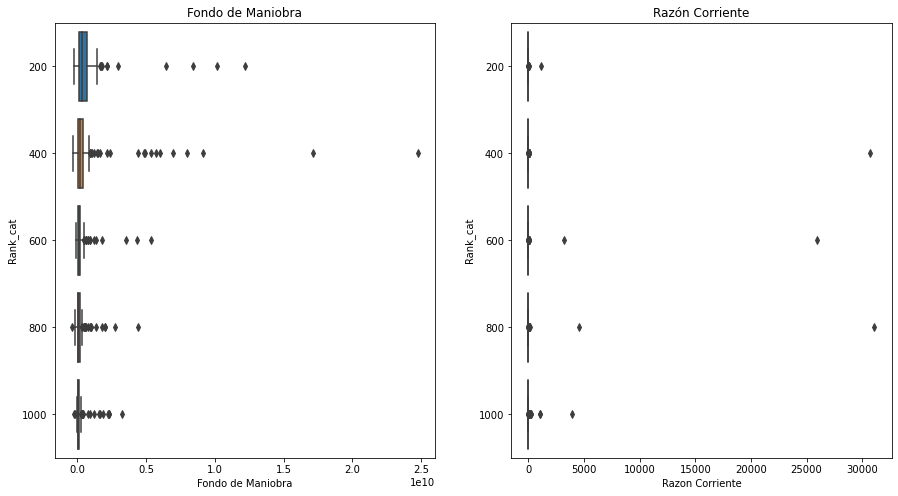

In [105]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

filt1 = data['INGRESOS OPERACIONALES\n2021*'] < data['INGRESOS OPERACIONALES\n2021*'][100]
data1 = data[filt1]
sns.boxplot(x = data1['Fondo de Maniobra'], y = data1['Rank_cat'], ax = ax[0])
ax[0].set_title('Fondo de Maniobra')


sns.boxplot(x = data1['Razon Corriente'], y = data1['Rank_cat'], ax = ax[1])
ax[1].set_title('Razón Corriente')

Text(0.5, 1.0, 'Razón Corriente')

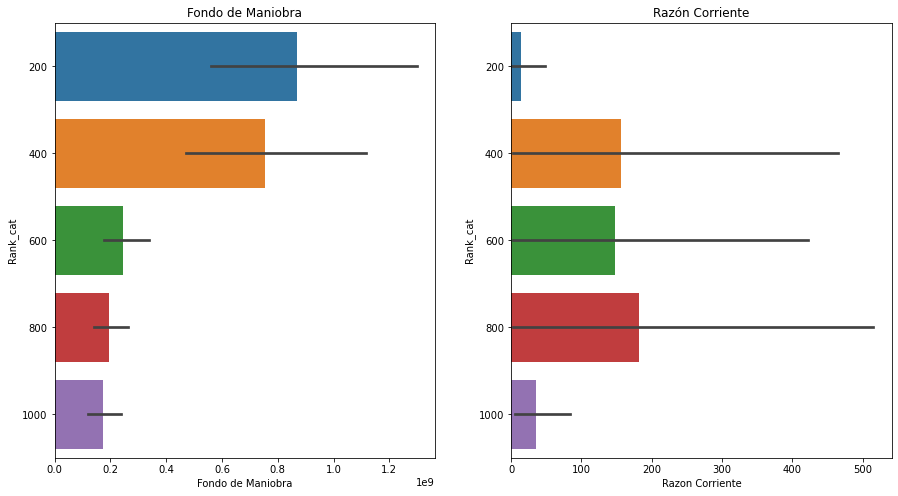

In [135]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
sns.barplot(x = data1['Fondo de Maniobra'], y = data1['Rank_cat'], ax = ax[0])
ax[0].set_title('Fondo de Maniobra')


sns.barplot(x = data1['Razon Corriente'], y = data1['Rank_cat'], ax = ax[1])
ax[1].set_title('Razón Corriente')

## Endeudamiento

Se contruyen las variables de endeudamiento a análizar y se grafíca para análizar la distribución de estas. 

In [94]:
data['Endeudatmiento Total'] = data['TOTAL PASIVOS 2021'] / data['TOTAL ACTIVOS 2021'] 
data['Apalancamiento Total'] = data['TOTAL PASIVOS 2021'] / data['TOTAL PATRIMONIO 2021'] 

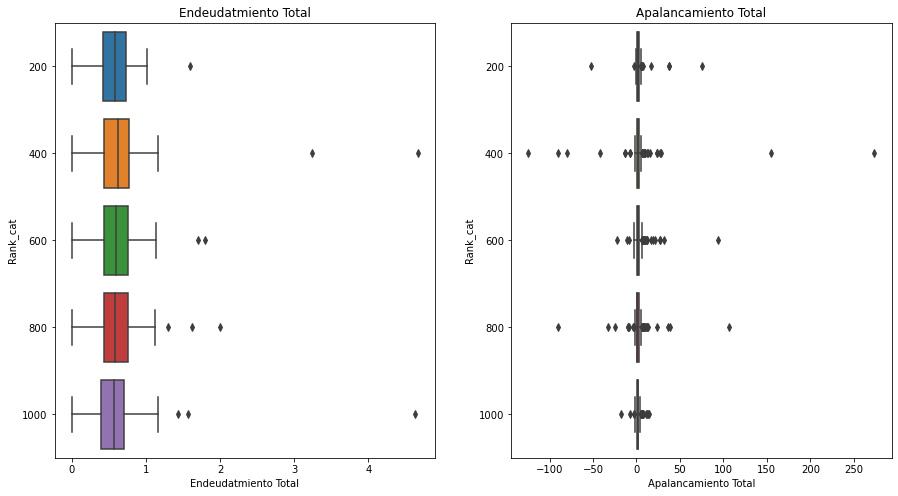

In [108]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

filt1 = data['INGRESOS OPERACIONALES\n2021*'] < data['INGRESOS OPERACIONALES\n2021*'][100]
data1 = data[filt1]
sns.boxplot(x = data1['Endeudatmiento Total'], y = data1['Rank_cat'], ax = ax[0])
ax[0].set_title('Endeudatmiento Total')


sns.boxplot(x = data1['Apalancamiento Total'], y = data1['Rank_cat'], ax = ax[1])
ax[1].set_title('Apalancamiento Total')

plt.show()

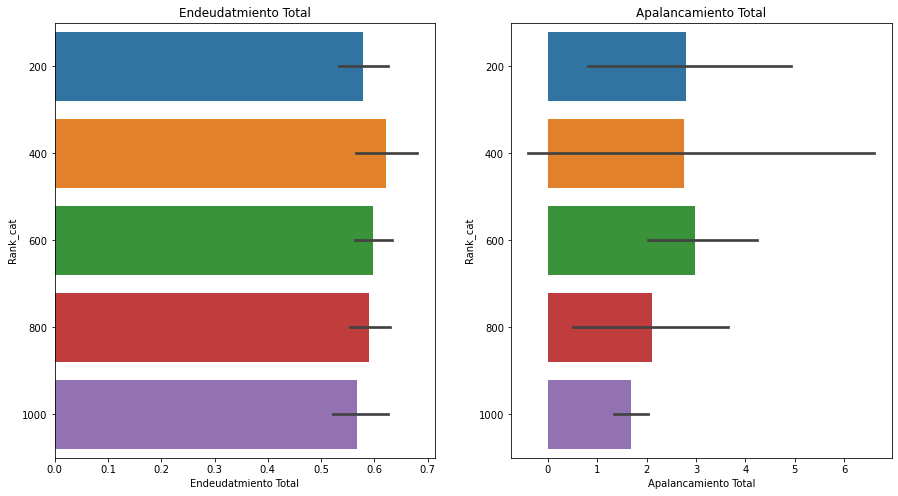

In [136]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

sns.barplot(x = data1['Endeudatmiento Total'], y = data1['Rank_cat'], ax = ax[0])
ax[0].set_title('Endeudatmiento Total')


sns.barplot(x = data1['Apalancamiento Total'], y = data1['Rank_cat'], ax = ax[1])
ax[1].set_title('Apalancamiento Total')

plt.show()

Análisis

Las empresas tieneden a tener niveles de endeudamiento muy similares, el endeudamiento todal es un poco mas de la mitad de los activos. por otro lado, el nivel de apalancamiento tiene un comportamiento más heterogeneo, pues el endeudamiento es generalmente mayor al patrimonio y en ocaciones tripicarlo como en las 6000 empresas más ricas. 